<a href="https://colab.research.google.com/github/Lavan1999/Dataset-18_CreditCardFraudDetection_XGB_OverSampling/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install xgboost

# **Librarys**

In [ ]:
import pandas as pd
import numpy as np

#Connections
from google.colab import drive

#Statistic
from scipy import stats

#Visualization
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import OrdinalEncoder

#Machine Learning
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import top_k_accuracy_score, precision_score, recall_score

# **Connections**

In [ ]:
#Google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading dataset**

In [ ]:
#Google drive
file_path = '/content/drive/My Drive/DTM15/Dataset/creditcard.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

# **DataFrame observation**


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# Dependent - Class
# Independent - Time, Amount

continuous_columns = ["Time", 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                      'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                      'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', "Amount"]
category_columns = ["Class"]

#Supervised Classification

# **Data cleaning using pandas**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.duplicated().sum()

1081

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.Class.value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [ ]:
#Imbalance

# **Hypothesis testing / Statistical analysis**


Continuous - Central Limit Theorem, 1-Tailed Test (one-sample t-test)

Continuous vs. Continuous - Correlation, 2-Tailed Test (two-sample t-test)

Continuous vs. Categorical - ANOVA (Analysis of Variance)

Categorical vs. Categorical - Chi-Square Test

In [ ]:
def CentralLimitTheorem(df, continuous_columns, sampling_rate = 0.20):
  df = df
  #Central Limit Theorem
  oneContinesColumn_result = {}
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      population=df[column].values
      population_mean = population.mean()
      sample_mean=[]
      for i in range(40):
        sample=np.random.choice(population,samplesize)
        sample_mean.append(sample.mean())
      oneContinesColumn_result[column] = {
                                          "Population Mean": population_mean,
                                          "Sample Means": {np.mean(sample_mean)}
                                          }
  return oneContinesColumn_result

In [ ]:
def OneTailTest(df, ContinesColumn_result, continuous_columns = [], sampling_rate = 0.20, sampling_frac=0.05):
  df = df
  oneContinesColumn_result = ContinesColumn_result
  hypothesis_df = pd.DataFrame(columns=df.columns, index=df.columns)
  #1-Tailed Test
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      H0_accepted = 0
      H0_rejected = 0
      for i in range(samplesize):
        sample=df[column].sample(frac=sampling_frac)
        t_test,p_value=stats.ttest_1samp(sample,df[column].mean())
        if p_value > 0.5:
          H0_accepted += 1
        else:
          H0_rejected += 1

      if H0_accepted > H0_rejected:
          oneContinesColumn_result[column].update( {
                                            "H0_accepted": H0_accepted,
                                            "H0_rejected": H0_rejected,
                                            "Conclusion": "H0 is accepted, Ha is rejected, There is no significant effect"
                                          } )
          hypothesis_df[column][column] = "There is a relationship"

      else:
          oneContinesColumn_result[column].update( {
                                              "H0_accepted": H0_accepted,
                                              "H0_rejected": H0_rejected,
                                              "Conclusion": "H0 is rejected, Ha is accepted, There is a significant effect"
                                              } )
          hypothesis_df[column][column] = "There is no relationship"
  return oneContinesColumn_result, hypothesis_df

In [ ]:
def TwoTailTest(df, comperativeColumn_result, continuous_columns = [], sampling_rate = 0.20, sampling_frac=0.05):
  df = df
  hypothesis_df = comperativeColumn_result
  #2-Tailed Test
  for i in range(len(continuous_columns) - 1):
      column_1 = continuous_columns[i]
      for column_2 in continuous_columns[i+1:]:
        H0_accepted = 0
        H0_rejected = 0
        for i in range(20):
          sample1 = df[column_1].sample(frac=sampling_frac)
          sample2 = df[column_2].sample(frac=sampling_frac)
          t_test, p_value = stats.ttest_ind(sample1, sample2)
          if p_value > 0.5:
            H0_accepted += 1
          else:
            H0_rejected += 1

        if H0_accepted > H0_rejected:
          #H0 is accepted, Ha is rejected, There is no significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
          hypothesis_df[column_1][column_2] = "There is a relationship"
          hypothesis_df[column_2][column_1] = "There is a relationship"
        else:
          #H0 is rejected, Ha is accepted, There is a significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
            hypothesis_df[column_1][column_2] = "There is no relationship"
            hypothesis_df[column_2][column_1] = "There is no relationship"
  return hypothesis_df

In [ ]:
def ANOVA(df, comperativeColumn_result, continuous_columns = [], category_columns = []):
  df = df
  hypothesis_df = comperativeColumn_result

  #ANOVA
  if continuous_columns and category_columns:
    for category_column in category_columns:
      for continuous_column in continuous_columns:
        group = df[category_column].unique()
        data = {}
        for i in group:
          data[i]=df[continuous_column][df[category_column]==i]

        f_value, p_value = stats.f_oneway(*[data[i] for i in group])
        if p_value > 0.05:
            # H0 is accepted, There is a relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is a relationship"
            hypothesis_df[continuous_column][category_column] = "There is a relationship"
        else:
            # H0 is rejected, There is no relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is no relationship"
            hypothesis_df[continuous_column][category_column] = "There is no relationship"

  return hypothesis_df

In [ ]:
ContinesColumn_result = CentralLimitTheorem(df, continuous_columns)

In [ ]:
ContinesColumn_result, comperativeColumn_result = OneTailTest(df, ContinesColumn_result, continuous_columns, sampling_rate = 0.02)

In [ ]:
comperativeColumn_result = TwoTailTest(df, comperativeColumn_result, continuous_columns, sampling_rate = 0.02)

In [ ]:
comperativeColumn_result = ANOVA(df, comperativeColumn_result, continuous_columns, category_columns)

In [ ]:
ContinesColumn_result_df = pd.DataFrame(ContinesColumn_result)
ContinesColumn_result_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Population Mean,94811.08,0.01,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,...,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,88.47
Sample Means,{94757.64289188475},{0.0049499385407567415},{-0.0013670102406983865},{0.0015109000822302245},{-0.0018612727798462772},{0.0014611902522457154},{-0.0006110424546626805},{0.0021053278783572365},{-0.0008812726534527087},{-0.00272025539052199},...,{-0.00045197920558328686},{-0.0005246382786924835},{0.00034847218237558366},{0.0007577924168464253},{0.00023282693034018127},{-0.0007379311945445515},{0.0002997599260298035},{0.0017146609946379766},{0.00039668954908269753},{88.45601135782888}
H0_accepted,2955,2928,2865,2919,2868,2841,2904,2933,2896,2919,...,2876,2902,2871,2832,2890,2877,2968,2882,2926,2857
H0_rejected,2719,2746,2809,2755,2806,2833,2770,2741,2778,2755,...,2798,2772,2803,2842,2784,2797,2706,2792,2748,2817
Conclusion,"H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...",...,"H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...","H0 is rejected, Ha is accepted, There is a sig...","H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si..."


In [ ]:
comperativeColumn_result

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,...,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship
V1,There is no relationship,There is a relationship,There is no relationship,There is a relationship,There is no relationship,There is a relationship,There is a relationship,There is no relationship,There is a relationship,There is no relationship,...,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship
V2,There is no relationship,There is no relationship,There is a relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is a relationship,There is no relationship,...,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship
V3,There is no relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is a relationship,There is a relationship,...,There is a relationship,There is no relationship,There is a relationship,There is a relationship,There is no relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is no relationship
V4,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is no relationship,...,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship
V5,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is no relationship,...,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship
V6,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is no relationship,There is a relationship,...,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship
V7,There is no relationship,There is no relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is a relationship,There is a relationship,There is a relationship,...,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no rela

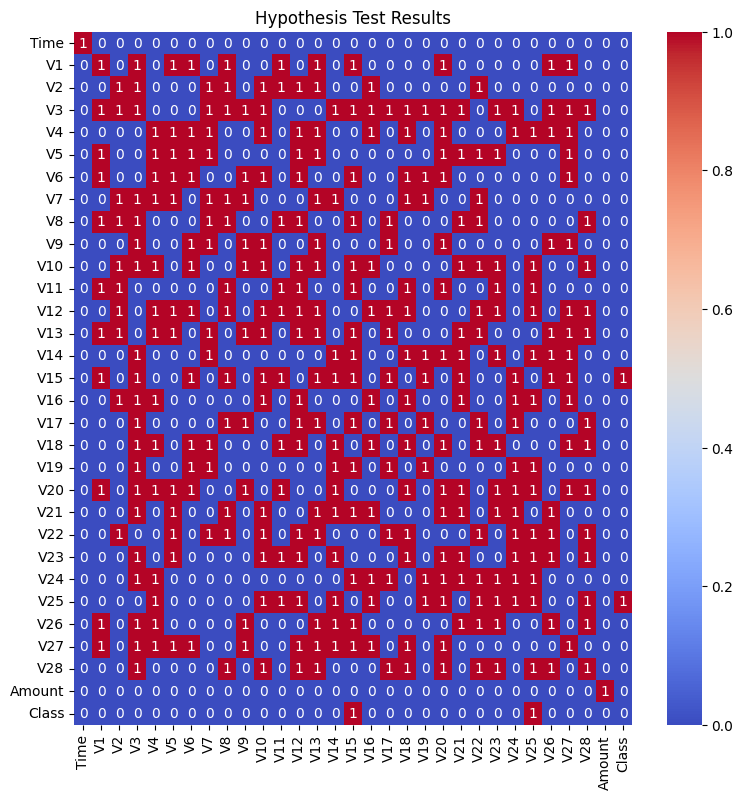

In [ ]:
# Create a heatmap
plt.figure(figsize = (9, 9))
sns.heatmap(comperativeColumn_result == 'There is a relationship', annot=True, cmap='coolwarm')
plt.title('Hypothesis Test Results')
plt.show()

# Correlation

In [ ]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


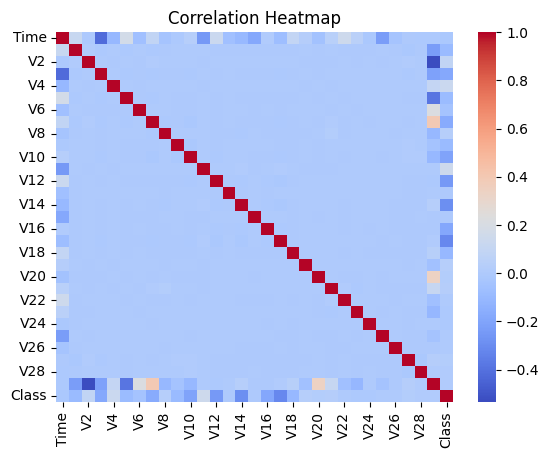

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Data Visualization**

<Figure size 800x600 with 0 Axes>

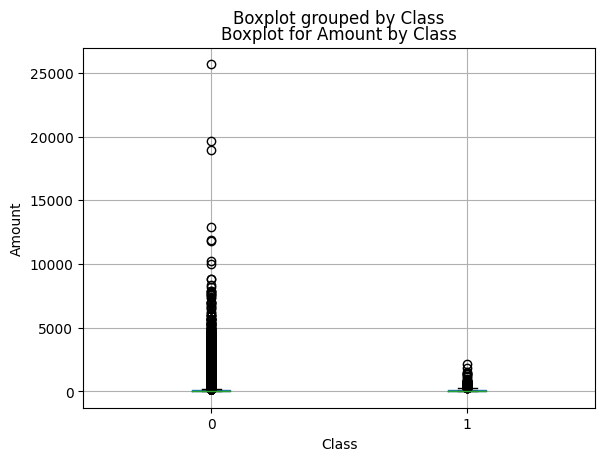

In [ ]:
plt.figure(figsize = (8, 6))
df.boxplot(column = "Amount", by = "Class")
plt.xlabel("Class")
plt.ylabel("Amount")
plt.title("Boxplot for Amount by Class")
plt.show()

<Figure size 800x600 with 0 Axes>

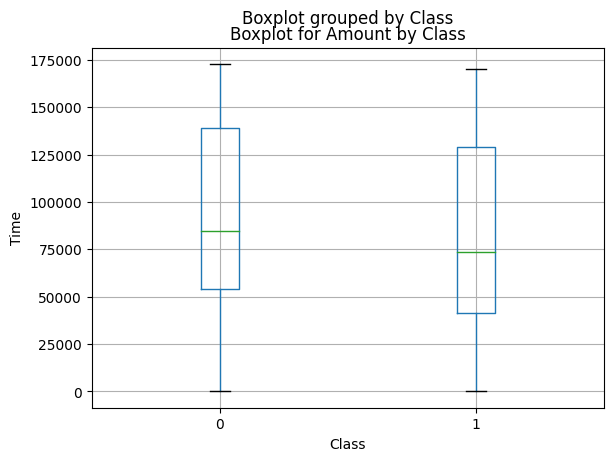

In [ ]:
plt.figure(figsize = (8, 6))
df.boxplot(column = "Time", by = "Class")
plt.xlabel("Class")
plt.ylabel("Time")
plt.title("Boxplot for Amount by Class")
plt.show()

# **Normalizing the dataset (Imbalance to balance dataset)**

In [ ]:
x=df.drop(['Class'], axis=1)
y=df['Class']

In [ ]:
#under sampling
from imblearn.under_sampling import NearMiss
model = NearMiss()
x_under, y_under = model.fit_resample(x,y)
x_under.shape, y_under.shape

((946, 30), (946,))

In [ ]:
#over sampling
from imblearn.combine import SMOTETomek
model = SMOTETomek()
x_over, y_over = model.fit_resample(x,y)
x_over.shape, y_over.shape

((565404, 30), (565404,))

# **Machine Learning**

In [ ]:
# 1 data availability
# 2 separating independent and dependent
# 3 identifying algorithms/Model
# 4 training
# 5 evaluation

**2 separating independent and dependent**


In [ ]:
#Imbalance
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25)
#Imbalance
x_train_under,x_test_under,y_train_under,y_test_under = train_test_split(x_under, y_under, test_size=0.25)
#over sampling
x_train_over,x_test_over,y_train_over,y_test_over = train_test_split(x_over, y_over, test_size=0.25)

**3 Identifying algorithms/Model:**

In [ ]:
#Imbalance
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train_under, x_test_under, y_train_under, y_test_under)
print(models)

 97%|█████████▋| 28/29 [00:03<00:00,  4.50it/s]

[LightGBM] [Info] Number of positive: 360, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000924 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7096
[LightGBM] [Info] Number of data points in the train set: 709, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507757 -> initscore=0.031032
[LightGBM] [Info] Start training from score 0.031032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████| 29/29 [00:05<00:00,  5.64it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.98               0.98     0.98      0.98   
AdaBoostClassifier                 0.98               0.98     0.98      0.98   
RandomForestClassifier             0.97               0.97     0.97      0.97   
XGBClassifier                      0.97               0.97     0.97      0.97   
SVC                                0.97               0.97     0.97      0.97   
BaggingClassifier                  0.97               0.96     0.96      0.97   
DecisionTreeClassifier             0.96               0.96     0.96      0.96   
LogisticRegression                 0.96               0.96     0.96      0.96   
ExtraTreesClassifier               0.96               0.96     0.96      0.96   
LinearSVC                          0.96               0.96     0.96      0.96   
CalibratedClassifierCV      

In [ ]:
#over sampling
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train_over,x_test_over,y_train_over,y_test_over)
print(models)

 38%|███▊      | 11/29 [26:22<44:57, 149.84s/it]

**4 training**

In [ ]:
#Imbalance

In [ ]:
# XGBClassifier
model_1 = XGBClassifier().fit(x_train, y_train)
y_pred_1 = model_1.predict(x_test)

In [ ]:
# LGBMClassifier
model_2 = LGBMClassifier().fit(x_train, y_train)
y_pred_2 = model_2.predict(x_test)

[LightGBM] [Info] Number of positive: 350, number of negative: 212444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080675 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 212794, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001645 -> initscore=-6.408501
[LightGBM] [Info] Start training from score -6.408501


In [ ]:
#under sampling

In [ ]:
# XGBClassifier
model_under_1 = XGBClassifier().fit(x_train_under, y_train_under)
y_pred_under_1 = model_under_1.predict(x_test_under)

In [ ]:
# LGBMClassifier
model_under_2 = LGBMClassifier().fit(x_train_under, y_train_under)
y_pred_under_2 = model_under_2.predict(x_test_under)


[LightGBM] [Info] Number of positive: 360, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000284 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7088
[LightGBM] [Info] Number of data points in the train set: 709, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507757 -> initscore=0.031032
[LightGBM] [Info] Start training from score 0.031032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [ ]:
#over sampling

In [ ]:
# XGBClassifier
model_over_1 = XGBClassifier().fit(x_train_over, y_train_over)
y_pred_over_1 = model_over_1.predict(x_test_over)

In [ ]:
# LGBMClassifier
model_over_2 = LGBMClassifier().fit(x_train_over, y_train_over)
y_pred_over_2 = model_over_2.predict(x_test_over)

[LightGBM] [Info] Number of positive: 359, number of negative: 350
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7095
[LightGBM] [Info] Number of data points in the train set: 709, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506347 -> initscore=0.025389
[LightGBM] [Info] Start training from score 0.025389
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

**5 Evaluation**

In [ ]:
#Imbalance

In [ ]:
# XGBClassifier
kas = top_k_accuracy_score(y_test, y_pred_1)
ps = precision_score(y_test, y_pred_1)
rs = recall_score(y_test, y_pred_1)
print( "XGBClassifier", "k_accuracy_score :", kas, "precision_score :", ps, "recall_score :", rs )
# LGBMClassifier
kas1 = top_k_accuracy_score(y_test, y_pred_2)
ps1 = precision_score(y_test, y_pred_2)
rs1 = recall_score(y_test, y_pred_2)
print( "LGBMClassifier", "k_accuracy_score :", kas1, "precision_score :", ps1, "recall_score :", rs1 )

XGBClassifier k_accuracy_score : 1.0 precision_score : 0.956989247311828 recall_score : 0.7235772357723578
LGBMClassifier k_accuracy_score : 1.0 precision_score : 0.2049469964664311 recall_score : 0.4715447154471545


In [ ]:
#under sampling

In [ ]:
# XGBClassifier
kas = top_k_accuracy_score(y_test, y_pred_under_1)
ps = precision_score(y_test, y_pred_under_1)
rs = recall_score(y_test, y_pred_under_1)
print( "XGBClassifier", "k_accuracy_score :", kas, "precision_score :", ps, "recall_score :", rs )
# LGBMClassifier
kas1 = top_k_accuracy_score(y_test, y_pred_under_2)
ps1 = precision_score(y_test, y_pred_under_2)
rs1 = recall_score(y_test, y_pred_under_2)
print( "LGBMClassifier", "k_accuracy_score :", kas1, "precision_score :", ps1, "recall_score :", rs1 )

XGBClassifier k_accuracy_score : 1.0 precision_score : 0.47580645161290325 recall_score : 0.5175438596491229
LGBMClassifier k_accuracy_score : 1.0 precision_score : 0.47540983606557374 recall_score : 0.5087719298245614


In [ ]:
#over sampling

In [ ]:
# XGBClassifier
kas2 = top_k_accuracy_score(y_test, y_pred_over_1)
ps2 = precision_score(y_test, y_pred_over_1)
rs2 = recall_score(y_test, y_pred_over_1)
print( "XGBClassifier", "k_accuracy_score :", kas2, "precision_score :", ps2, "recall_score :", rs2 )
# LGBMClassifier
kas3 = top_k_accuracy_score(y_test, y_pred_over_2)
ps3 = precision_score(y_test, y_pred_over_2)
rs3 = recall_score(y_test, y_pred_over_2)
print( "LGBMClassifier", "k_accuracy_score :", kas3, "precision_score :", ps3, "recall_score :", rs3 )

XGBClassifier k_accuracy_score : 1.0 precision_score : 0.9819819819819819 recall_score : 0.956140350877193
LGBMClassifier k_accuracy_score : 1.0 precision_score : 1.0 recall_score : 0.9473684210526315
